---

# Data Mining:<br>Statistical Modeling and Learning from Data

## Dr. Ciro Cattuto<br>Dr. Laetitia Gauvin<br>Dr. André Panisson

### Exercises - Cross Validation and Regularization

---

In [7]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## 1. Load the Diabetes dataset

The diabetes dataset consists of 10 physiological variables (age, sex, weight, blood pressure) measure on 442 patients, and an indication of disease progression after one year.

http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html#sklearn.datasets.load_diabetes

Reference:
   [http://web.stanford.edu/~hastie/Papers/LARS/LeastAngle_2002.pdf]

Load the features in a variable with name $\mathbf{X}$ and the target in a variable with name $\mathbf{y}$.

In [8]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

In [9]:
X.shape

(442, 10)

In [10]:
y.shape

(442,)

NameError: name 'y' is not defined

## 2. Evaluate a Linear Regression model using 10-fold cross-validation

Create a Linear Regression model and assign it to a variable with name **`lr`**.   
http://scikit-learn.org/stable/modules/linear_model.html#ordinary-least-squares

Create a cross validation generator with 10 folds. Set the parameter **`shuffle`** to **`True`**, in order to shuffle the data before creating the folds. Set the parameter **`random_state`** to 0 to create always the same combination of folds.
Assign it to a variable with name **`cv`**.   
http://scikit-learn.org/stable/modules/cross_validation.html#k-fold

Use the function **`cross_val_score`** to evaluate the model using the cross validator. This function returns a list of scores.   
http://scikit-learn.org/stable/modules/cross_validation.html#computing-cross-validated-metrics

Finally, print the mean and standard deviation of the scores.

In [20]:
# YOUR CODE HERE
#dataset composto dalla features matrix X e target Y,
#dividiamo il dataset in 10 parti, ogni volta prendiamo un fold come
#dataset di validazione e gli altri come trainingset
# --> usiamo tutti i dati per fare training, e tutti i dati come controllo

#vai sui link sopra per vedere la documentaizone: classe K-Fold:
#c'è il parametro shuffle. 0 (False): non mischia i dati, 
#shuffle=1 (True): li mischia

# funzione cross_val_score: vedi i parametri. Divide il dataset, fa il trainin
#con una parte e la validazione con l'atra, n volte. (fa tutta la cross
#validation da sola)

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_val_score

lr = LinearRegression() 

cv = KFold( n_splits=10, shuffle=True, random_state=0) #crossvalidation
cv.get_n_splits(X.shape[0])

print (cv)

print (type(cv))
scores = cross_val_score(lr, X, y, cv=cv)
#se non passiamo nesuna funzione di validazione a cross_val_score, succede
#che viene usata di default quella del modello. in questo caso quella di lr

#in tutti i modelli c'è un metodo chiamato score

############################################
# non ho il pcchetto model_selection !!! devo scaricare la versione più
# aggiornata di anaconda
#############################################

KFold(n_splits=10, random_state=0, shuffle=True)
<class 'sklearn.model_selection._split.KFold'>


In [24]:
scores

array([0.35720577, 0.2716695 , 0.5484652 , 0.36636058, 0.58562806,
       0.46895863, 0.52219171, 0.5063803 , 0.6621795 , 0.54962916])

In [25]:
print (np.mean(scores))
print (np.std(scores))

0.4838668390667108
0.11301537460659494


In [26]:
#se vado su sklearn, model_selection, trovo il pacchetto metrics:
#interessanti: per la parte di regressione possiamo utilizzare:
#-MeanAbsoluteError. possiamo trasformare questo valore di errore in score,
#semplicemente facendo *-1
#-MeanSquareError --> stessa cosa
#queste indicano un buon modello se sono vicine a zero
#r^2 --> indica buon modello se è vicina a 1. Vai a vedere sulle librerie
#come è calcolato.


## 3. Redo the same evaluation, this time using the Mean Squared Error as score function

Check which score function is used by the validator by default.

Create a new scorer function that calculates the Mean Squared Error. You can use the function **`mean_squared_error`** from sklearn:   
http://scikit-learn.org/stable/modules/model_evaluation.html#the-scoring-parameter-defining-model-evaluation-rules

Use again the function **`cross_val_score`** to evaluate the model using the cross validator and the new scorer.

Finally, print the mean and standard deviation of the new scores.

In [28]:
print(lr.score.__doc__)

Returns the coefficient of determination R^2 of the prediction.

        The coefficient R^2 is defined as (1 - u/v), where u is the residual
        sum of squares ((y_true - y_pred) ** 2).sum() and v is the total
        sum of squares ((y_true - y_true.mean()) ** 2).sum().
        The best possible score is 1.0 and it can be negative (because the
        model can be arbitrarily worse). A constant model that always
        predicts the expected value of y, disregarding the input features,
        would get a R^2 score of 0.0.

        Parameters
        ----------
        X : array-like, shape = (n_samples, n_features)
            Test samples. For some estimators this may be a
            precomputed kernel matrix instead, shape = (n_samples,
            n_samples_fitted], where n_samples_fitted is the number of
            samples used in the fitting for the estimator.

        y : array-like, shape = (n_samples) or (n_samples, n_outputs)
            True values for X.

        sa

In [29]:
# YOUR CODE HERE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error, make_scorer

lr = LinearRegression() 
cv = KFold(n_splits=10, shuffle=True, random_state=0) #crossvalidation
scores = cross_val_score(lr, X, y, cv=cv, 
                         scoring=make_scorer(mean_squared_error))
     #si può usare anche: scoring = 'neg_mean_squared_error

print (scores)
print (np.mean(scores))
print (np.std(scores))

[3111.99256241 3766.9951443  2346.2970198  3501.04731142 2651.32867422
 3359.19876335 2644.81205146 3098.28031011 2254.54473914 3117.78614971]
2985.228272592277
472.5471306514756


In [30]:
? make_scorer()

## 4. Evaluate a Lasso model using 10-fold cross-validation

Create a Lasso model with default parameters and assign it to a variable with name **`lasso`**.   
http://scikit-learn.org/stable/modules/linear_model.html#lasso

Create a cross validation generator with 10 folds. Set the parameter **`shuffle`** to **`True`**, in order to shuffle the data before creating the folds. Set the parameter **`random_state`** to 0 to create always the same combination of folds.
Assign it to a variable with name **`cv`**.   
http://scikit-learn.org/stable/modules/cross_validation.html#k-fold

Use the function **`cross_val_score`** to evaluate the model using the cross validator.
Use the scorer function that calculates the Mean Squared Error to calculate the scores.   
http://scikit-learn.org/stable/modules/cross_validation.html#computing-cross-validated-metrics

Finally, print the mean and standard deviation of the scores.

In [31]:
# YOUR CODE HERE
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error, make_scorer

lasso = Lasso() 
cv = KFold(n_splits=10, shuffle=True, random_state=0) #crossvalidation
scores = cross_val_score(lasso, X, y, cv=cv, 
                         scoring='neg_mean_squared_error')

print (np.mean(scores))
print (np.std(scores))

#questo modello risulta peggiore del precedente, però non abbiamo cercato
#il valore migliore del parametro alfa di regolarizazione.
#lo facciamo nel prossimo esercizio

-3864.0222424285066
374.3830870563493


Compare the average scores of the Lasso model with the LinearRegression. Is it better? Why?

## 5. Find the best regularization parameter for a Lasso model using 10-fold cross-validation

Create a Lasso model with default parameters and assign it to a variable with name **`lasso`**.   
http://scikit-learn.org/stable/modules/linear_model.html#lasso

Create a list of values for the regularization parameter (alpha) starting from $10^{-4}$ to $10^{-0.5}$, spaced evenly on a log scale.

For each value of alpha, set the model parameter **`alpha`** to this value, calculate the 10-fold cross-validation scores, and add the average score to a list with name **`scores`**.

In [32]:
np.logspace(-4, -0.5, 10)
#funzione utile per esplorare uno spazio da valori molto piccoli a valori
#molto alti. 

#questa è la lista di alfa che andremo a esplorare

array([1.00000000e-04, 2.44843675e-04, 5.99484250e-04, 1.46779927e-03,
       3.59381366e-03, 8.79922544e-03, 2.15443469e-02, 5.27499706e-02,
       1.29154967e-01, 3.16227766e-01])

In [33]:
# YOUR CODE HERE
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error, make_scorer


cv = KFold(n_splits=10, shuffle=True, random_state=0) #crossvalidation
scores = []

#ciclo sugli alfa per sondare lo spazio degli iperparametri
alphas = np.logspace(-2, 0, 30)
for alpha in alphas:
    lasso = Lasso(alpha = alpha) 
    scores.append(np.mean(cross_val_score(lasso, X, y, cv=cv, 
                         scoring= make_scorer(mean_squared_error))))

print (np.mean(scores))
print (np.std(scores))


3117.225341865959
221.0186496111267


Finally, let's plot the scores and print the best regularization parameter.

2981.4247373941193
Best alpha: 0.04893900918477494


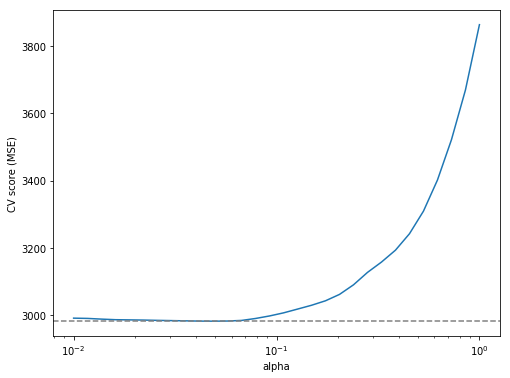

In [34]:
# Facciamo un plot con scala log sulle x perchè abbiamo utilizzato uno spacing logaritmico nella ricerca
# del parametro alfa ottimale

figure(figsize=(8, 6))
semilogx(alphas, scores)
ylabel('CV score (MSE)')
xlabel('alpha')
axhline(np.min(scores), linestyle='--', color='.5')

print (np.min(scores))
print ('Best alpha:', alphas[np.argmin(scores)])


[1.00000000e+00 3.59381366e+00 1.29154967e+01 4.64158883e+01
 1.66810054e+02 5.99484250e+02 2.15443469e+03 7.74263683e+03
 2.78255940e+04 1.00000000e+05]
[0 1 2 3 4 5 6 7 8 9]


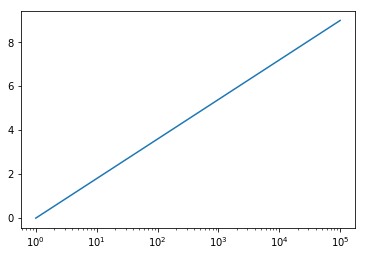

In [37]:
#PROVE

x = logspace(0, 5, 10)
y = arange(10)
print(x)
print(y)
semilogx(x,y)